In [98]:
query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, count(*) transaction_count, avg(amount) transaction_avg_amount, min(balance) transaction_min_balance,
           max(balance) transaction_max_balance, avg(balance) transaction_avg_balance
    from transactions
    group by account_id
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.transaction_count, t.transaction_avg_amount, t.transaction_min_balance,
       t.transaction_max_balance, t.transaction_avg_balance,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes,
       l.status as loan_status
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
"""

In [99]:
import pandas as pd
import sqlite3

train_dataset = None

with sqlite3.connect("./database_train.db") as db:
    train_dataset = pd.read_sql_query(sql = query, con = db)
    
train_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status
0,940105,80952,24,3373,930226,54,7954.257407,1100.0,67529.6,32590.624074,100.0,12541,0.43,0.082250,1
1,960429,30276,12,2523,950407,80,5856.300000,715.0,58157.5,25197.092500,67.0,9104,2.07,0.022778,-1
2,960502,165960,24,6915,941019,125,12822.353600,700.0,107069.6,52523.244800,56.9,8427,1.54,0.020366,1
3,961106,88440,12,7370,960511,31,14850.767742,200.0,103239.0,62778.090323,85.3,9317,7.07,0.053638,1
4,940531,104808,12,8734,931126,30,6642.553333,500.0,57865.3,38709.830000,48.3,8512,4.12,0.016713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,961002,392460,60,6541,941124,143,12882.523077,900.0,115913.4,57131.740559,58.0,8754,4.31,0.035858,1
324,930915,52788,12,4399,930114,43,3714.897674,1000.0,41469.1,22198.179070,51.9,9045,3.60,0.031958,1
325,951029,419880,60,6998,950526,18,24426.472222,200.0,104039.9,59352.833333,100.0,12541,0.43,0.082250,1
326,960806,54024,12,4502,941001,147,8708.722449,1000.0,81705.8,36480.185034,53.8,8814,5.74,0.017464,1


In [100]:
# # Data Cleaning

# # Convert empty k_symbol to None
# for index in range(len(train_dataset.k_symbol)):
#     if train_dataset.k_symbol[index] == " ":
#         train_dataset.k_symbol[index] = None


# interpolated = train_dataset.interpolate(method ='pad')

# # Search for None Operations
# lines_to_drop = set([])
# for index in range(len(interpolated.operation)):
#     if interpolated.operation[index] == None:
#         lines_to_drop.add(index)

# cleaned_interpolated = interpolated.drop(list(lines_to_drop).copy(), axis=0)
# cleaned_interpolated

In [101]:
# Standarization

from sklearn.preprocessing import StandardScaler

# Everything except loan_duration, loan_status
features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "transaction_count", "transaction_avg_amount",	"transaction_min_balance", "transaction_max_balance", "transaction_avg_balance", "ratio_urban_inhabitants", "avg_salary", "unemployment", "crimes"]
train_dataset_to_scale = train_dataset[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_train_dataset = pd.DataFrame(scaler.fit_transform(train_dataset_to_scale), columns = train_dataset_to_scale.columns)

scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes
0,-1.042517,-0.612414,-0.355176,-0.985717,-0.461789,-0.374774,0.425408,-0.608173,-0.807099,1.526166,2.171935,-1.378454,2.151830
1,1.101134,-1.094644,-0.743255,0.951110,0.118886,-0.872515,0.076796,-0.880016,-1.364673,-0.080293,-0.360561,-0.635902,-0.764438
2,1.108834,0.196517,1.261973,0.050117,1.123901,0.780185,0.063214,0.538711,0.696095,-0.571967,-0.859397,-0.875873,-0.882694
3,1.172540,-0.541159,1.469709,1.920818,-0.975464,1.261427,-0.389528,0.427602,1.469452,0.810561,-0.203615,1.627978,0.748831
4,-0.997585,-0.385402,2.092462,-0.899342,-0.997797,-0.685976,-0.117883,-0.888492,-0.345626,-0.990620,-0.796766,0.292289,-1.061835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1.161571,2.351879,1.091218,0.060194,1.525907,0.794460,0.244311,0.795231,1.043640,-0.518419,-0.618453,0.378316,-0.123031
324,-2.011822,-0.880421,0.113258,-0.996466,-0.707460,-1.380564,0.334860,-1.364074,-1.590832,-0.815370,-0.404034,0.056845,-0.314273
325,0.109680,2.612807,1.299868,0.962530,-1.265802,3.533269,-0.389528,0.450833,1.211141,1.526166,2.171935,-1.378454,2.151830
326,1.140898,-0.868660,0.160285,0.048390,1.615242,-0.195776,0.334860,-0.196983,-0.513772,-0.722877,-0.574243,1.025786,-1.024978


In [102]:
# Remove outliers from scaled_train_dataset

lines_to_drop = set([])
for column in scaled_train_dataset.columns:
    for line_number in range(len(scaled_train_dataset[column])):
        value = scaled_train_dataset[column][line_number]
        if value > 3.0 or value < -3.0:
            lines_to_drop.add(line_number)


no_outliers_scaled_train_dataset = scaled_train_dataset.drop(list(lines_to_drop).copy(), axis=0)
no_outliers_train_dataset = train_dataset.drop(list(lines_to_drop).copy(), axis=0)

no_outliers_scaled_train_dataset = no_outliers_scaled_train_dataset.reset_index()
no_outliers_scaled_train_dataset = no_outliers_scaled_train_dataset.drop(['index'], axis=1)
no_outliers_scaled_train_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes
0,-1.042517,-0.612414,-0.355176,-0.985717,-0.461789,-0.374774,0.425408,-0.608173,-0.807099,1.526166,2.171935,-1.378454,2.151830
1,1.101134,-1.094644,-0.743255,0.951110,0.118886,-0.872515,0.076796,-0.880016,-1.364673,-0.080293,-0.360561,-0.635902,-0.764438
2,1.108834,0.196517,1.261973,0.050117,1.123901,0.780185,0.063214,0.538711,0.696095,-0.571967,-0.859397,-0.875873,-0.882694
3,1.172540,-0.541159,1.469709,1.920818,-0.975464,1.261427,-0.389528,0.427602,1.469452,0.810561,-0.203615,1.627978,0.748831
4,-0.997585,-0.385402,2.092462,-0.899342,-0.997797,-0.685976,-0.117883,-0.888492,-0.345626,-0.990620,-0.796766,0.292289,-1.061835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1.068437,-0.527456,-0.185334,0.990554,-1.020131,0.945043,0.153763,0.797865,1.453856,1.034492,0.430061,1.935866,-0.144578
310,1.161571,2.351879,1.091218,0.060194,1.525907,0.794460,0.244311,0.795231,1.043640,-0.518419,-0.618453,0.378316,-0.123031
311,-2.011822,-0.880421,0.113258,-0.996466,-0.707460,-1.380564,0.334860,-1.364074,-1.590832,-0.815370,-0.404034,0.056845,-0.314273
312,1.140898,-0.868660,0.160285,0.048390,1.615242,-0.195776,0.334860,-0.196983,-0.513772,-0.722877,-0.574243,1.025786,-1.024978


In [103]:
# Binarization
from sklearn.preprocessing import Binarizer

train_dataset_to_binarize = no_outliers_train_dataset[["loan_status"]]

# 0 <==> loan_status = -1
# 1 <==> loan_status = 1
binarizer = Binarizer()
binarized_train_data_set = pd.DataFrame(binarizer.fit_transform(train_dataset_to_binarize), columns = train_dataset_to_binarize.columns)

binarized_train_data_set

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
309,1
310,1
311,1
312,1


In [104]:
# One-hot encoder

from sklearn.preprocessing import OneHotEncoder

col_names_to_encode = ["loan_duration"]
train_dataset_to_hotencode = no_outliers_train_dataset[col_names_to_encode]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(train_dataset_to_hotencode)

columns = []
for index, column_name in enumerate(col_names_to_encode):
    columns = columns + [f"is_{column_name}_{val}" for val in res.categories_[index]]

hot_encoded_train_dataset = pd.DataFrame(res.transform(train_dataset_to_hotencode), columns = columns)

hot_encoded_train_dataset

,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
309,0.0,1.0,0.0,0.0,0.0
310,0.0,0.0,0.0,0.0,1.0
311,1.0,0.0,0.0,0.0,0.0
312,1.0,0.0,0.0,0.0,0.0


In [105]:
# Recreate train_dataset after preprocessing

pre_processed_dataframe = no_outliers_scaled_train_dataset

pre_processed_dataframe["loan_status"] = binarized_train_data_set.values

for column_name in hot_encoded_train_dataset.columns:
    pre_processed_dataframe[column_name] = hot_encoded_train_dataset[column_name]

pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60
0,-1.042517,-0.612414,-0.355176,-0.985717,-0.461789,-0.374774,0.425408,-0.608173,-0.807099,1.526166,2.171935,-1.378454,2.151830,1,0.0,1.0,0.0,0.0,0.0
1,1.101134,-1.094644,-0.743255,0.951110,0.118886,-0.872515,0.076796,-0.880016,-1.364673,-0.080293,-0.360561,-0.635902,-0.764438,0,1.0,0.0,0.0,0.0,0.0
2,1.108834,0.196517,1.261973,0.050117,1.123901,0.780185,0.063214,0.538711,0.696095,-0.571967,-0.859397,-0.875873,-0.882694,1,0.0,1.0,0.0,0.0,0.0
3,1.172540,-0.541159,1.469709,1.920818,-0.975464,1.261427,-0.389528,0.427602,1.469452,0.810561,-0.203615,1.627978,0.748831,1,1.0,0.0,0.0,0.0,0.0
4,-0.997585,-0.385402,2.092462,-0.899342,-0.997797,-0.685976,-0.117883,-0.888492,-0.345626,-0.990620,-0.796766,0.292289,-1.061835,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1.068437,-0.527456,-0.185334,0.990554,-1.020131,0.945043,0.153763,0.797865,1.453856,1.034492,0.430061,1.935866,-0.144578,1,0.0,1.0,0.0,0.0,0.0
310,1.161571,2.351879,1.091218,0.060194,1.525907,0.794460,0.244311,0.795231,1.043640,-0.518419,-0.618453,0.378316,-0.123031,1,0.0,0.0,0.0,0.0,1.0
311,-2.011822,-0.880421,0.113258,-0.996466,-0.707460,-1.380564,0.334860,-1.364074,-1.590832,-0.815370,-0.404034,0.056845,-0.314273,1,1.0,0.0,0.0,0.0,0.0
312,1.140898,-0.868660,0.160285,0.048390,1.615242,-0.195776,0.334860,-0.196983,-0.513772,-0.722877,-0.574243,1.025786,-1.024978,1,1.0,0.0,0.0,0.0,0.0


In [106]:
#Remove Redundant (Duplicates)

pre_processed_dataframe = pre_processed_dataframe.drop_duplicates()
pre_processed_dataframe

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_status,is_loan_duration_12,is_loan_duration_24,is_loan_duration_36,is_loan_duration_48,is_loan_duration_60
0,-1.042517,-0.612414,-0.355176,-0.985717,-0.461789,-0.374774,0.425408,-0.608173,-0.807099,1.526166,2.171935,-1.378454,2.151830,1,0.0,1.0,0.0,0.0,0.0
1,1.101134,-1.094644,-0.743255,0.951110,0.118886,-0.872515,0.076796,-0.880016,-1.364673,-0.080293,-0.360561,-0.635902,-0.764438,0,1.0,0.0,0.0,0.0,0.0
2,1.108834,0.196517,1.261973,0.050117,1.123901,0.780185,0.063214,0.538711,0.696095,-0.571967,-0.859397,-0.875873,-0.882694,1,0.0,1.0,0.0,0.0,0.0
3,1.172540,-0.541159,1.469709,1.920818,-0.975464,1.261427,-0.389528,0.427602,1.469452,0.810561,-0.203615,1.627978,0.748831,1,1.0,0.0,0.0,0.0,0.0
4,-0.997585,-0.385402,2.092462,-0.899342,-0.997797,-0.685976,-0.117883,-0.888492,-0.345626,-0.990620,-0.796766,0.292289,-1.061835,1,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,1.068437,-0.527456,-0.185334,0.990554,-1.020131,0.945043,0.153763,0.797865,1.453856,1.034492,0.430061,1.935866,-0.144578,1,0.0,1.0,0.0,0.0,0.0
310,1.161571,2.351879,1.091218,0.060194,1.525907,0.794460,0.244311,0.795231,1.043640,-0.518419,-0.618453,0.378316,-0.123031,1,0.0,0.0,0.0,0.0,1.0
311,-2.011822,-0.880421,0.113258,-0.996466,-0.707460,-1.380564,0.334860,-1.364074,-1.590832,-0.815370,-0.404034,0.056845,-0.314273,1,1.0,0.0,0.0,0.0,0.0
312,1.140898,-0.868660,0.160285,0.048390,1.615242,-0.195776,0.334860,-0.196983,-0.513772,-0.722877,-0.574243,1.025786,-1.024978,1,1.0,0.0,0.0,0.0,0.0


In [107]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Binarizer
# from sklearn.preprocessing import OneHotEncoder

# def pre_process_dataset(dataset, is_test_dataset):
#     # Standarization

#     # Everything except loan_duration, loan_status
#     features_to_standardize = ["loan_date", "loan_amount", "loan_payments", "account_creation", "transaction_count", "transaction_avg_amount", "transaction_min_balance", "transaction_max_balance", "transaction_avg_balance"]
#     dataset_to_scale = dataset[features_to_standardize]

#     scaler = StandardScaler()
#     scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset_to_scale), columns = dataset_to_scale.columns)

#     # Binarization
#     if not is_test_dataset:
#         dataset_to_binarize = dataset[["loan_status"]]

#         # 0 <==> loan_status = -1
#         # 1 <==> loan_status = 1
#         binarizer = Binarizer()
#         binarized_data_set = pd.DataFrame(binarizer.fit_transform(dataset_to_binarize), columns = dataset_to_binarize.columns)

#     # One-hot encoder
#     dataset_to_hotencode = dataset[["loan_duration"]]

#     encoder = OneHotEncoder(sparse=False)
#     res = encoder.fit(dataset_to_hotencode)

#     column_names = [f"is_loan_duration {duration_val}" for duration_val in res.categories_[0]]

#     hot_encoded_dataset = pd.DataFrame(res.transform(dataset_to_hotencode), columns = column_names)

#     # Recreate dataset after preprocessing
#     pre_processed_dataframe = scaled_dataset
#     for column_name in hot_encoded_dataset.columns:
#         pre_processed_dataframe[column_name] = hot_encoded_dataset[column_name]

#     if not is_test_dataset:
#         pre_processed_dataframe["loan_status"] = binarized_data_set.values

#     return pre_processed_dataframe
    

In [108]:
# pre_processed_dataframe = pre_process_dataset(train_dataset, False)
pre_processed_features = pre_processed_dataframe.drop("loan_status", axis=1)
pre_processed_labels = pre_processed_dataframe.loan_status

In [109]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=19, sampling_strategy="auto")
features_res, labels_res = smt.fit_resample(pre_processed_features, pre_processed_labels)

In [110]:
from  sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features_res, labels_res, random_state=19)

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_random_forest_overfit(x_train, x_test, y_train, y_test):
    train_scores = []
    test_scores = []

    estimators = []
    # scores = []
    classifiers = []
    technique = []

    for estimator in range(1, 50):
        rf = RandomForestClassifier(n_estimators= estimator, random_state = 19)
        rf.fit(x_train, y_train)

        # Evaluate train
        train_yhat = rf.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = rf.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        estimators.append(estimator)
        # scores.append(rf.score(x_test, y_test))
        classifiers.append(rf)
        technique.append("random forest")

    pyplot.plot(estimators, train_scores, '-o', label='Train')
    pyplot.plot(estimators, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

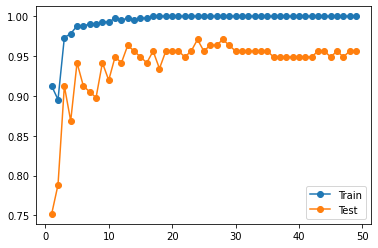

In [112]:
watch_random_forest_overfit(x_train, x_test, y_train, y_test)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

def watch_kneighbors_overfit(x_train, x_test, y_train, y_test):
    neighbors = []
    classifiers = []

    train_scores = []
    test_scores = []

    for neighbor in range(1,50):
        kn = KNeighborsClassifier(n_neighbors=neighbor)
        kn.fit(x_train, y_train)

        # Evaluate train
        train_yhat = kn.predict(x_train)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)

        # Evaluate test
        test_yhat = kn.predict(x_test)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)

        neighbors.append(neighbor)
        classifiers.append(kn)
    
    pyplot.plot(neighbors, train_scores, '-o', label='Train')
    pyplot.plot(neighbors, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

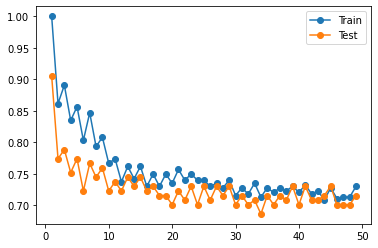

In [114]:
watch_kneighbors_overfit(x_train, x_test, y_train, y_test)

In [115]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# !!! No more convergence warnings
simplefilter("ignore", category=ConvergenceWarning)

shapes = []
activations = []
learn_rates = []
# scores = []
classifiers = []
technique = []

def watch_overfit_mlp(x_train, x_test, y_train, y_test): 
    for activation in ["logistic", "tanh", "relu"]:
        print(f"Activation = {activation}")

        for learn_rate in ["constant", "invscaling", "adaptive"]:
            print(f"Learn Rate = {learn_rate}")

            for n_layers in range(1, 6):
                print(f"# Layers = {n_layers}")

                train_scores = []
                test_scores = []
                layer_sizes = []

                for layer_size in range(4, 20):
                    shape = tuple(layer_size for _ in range(n_layers))
                    shapes.append(shape)
                    activations.append(activation)
                    learn_rates.append(learn_rate)
                    layer_sizes.append(layer_size)

                    nn = MLPClassifier(hidden_layer_sizes=shape, activation=activation, learning_rate=learn_rate, random_state=19)
                    nn.fit(x_train, y_train)

                    # Evaluate train
                    train_yhat = nn.predict(x_train)
                    train_acc = accuracy_score(y_train, train_yhat)
                    train_scores.append(train_acc)

                    # Evaluate test
                    test_yhat = nn.predict(x_test)
                    test_acc = accuracy_score(y_test, test_yhat)
                    test_scores.append(test_acc)

                    classifiers.append(nn)
                    technique.append("Multi Layer Perceptron")
                    # scores.append(nn.score(x_test, y_test))

                pyplot.plot(layer_sizes, train_scores, '-o', label='Train')
                pyplot.plot(layer_sizes, test_scores, '-o', label='Test')
                pyplot.legend()
                pyplot.show()
    

Activation = logistic
Learn Rate = constant
# Layers = 1


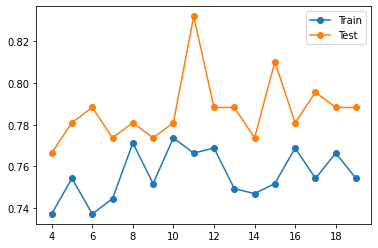

# Layers = 2


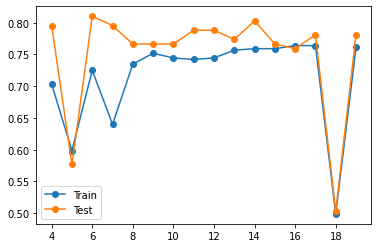

# Layers = 3


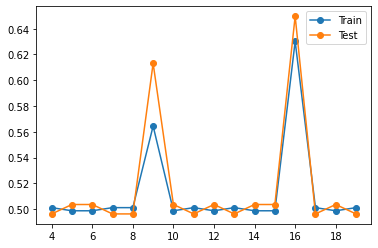

# Layers = 4


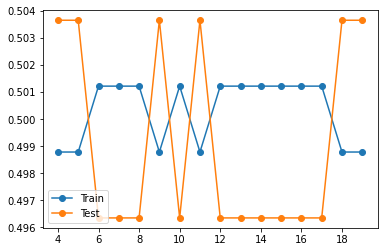

# Layers = 5


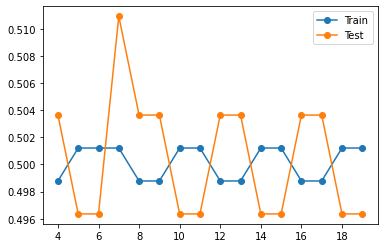

Learn Rate = invscaling
# Layers = 1


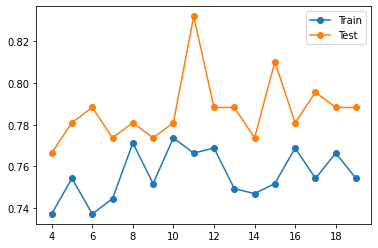

# Layers = 2


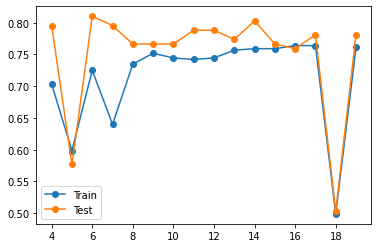

# Layers = 3


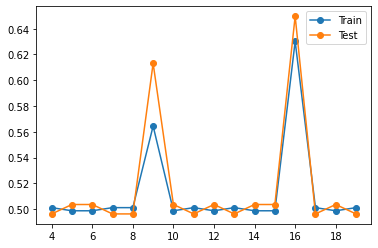

# Layers = 4


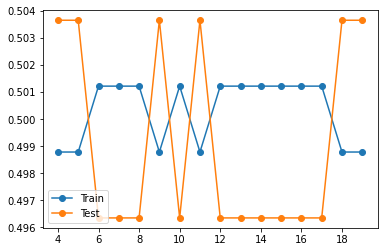

# Layers = 5


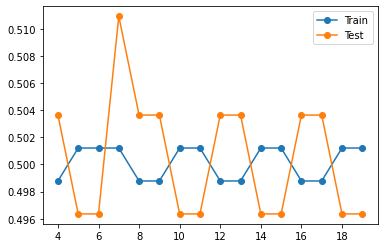

Learn Rate = adaptive
# Layers = 1


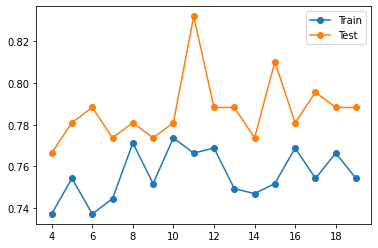

# Layers = 2


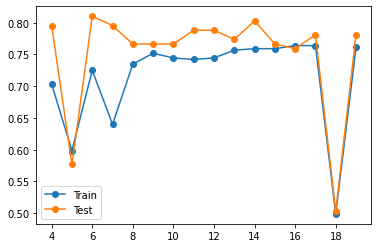

# Layers = 3


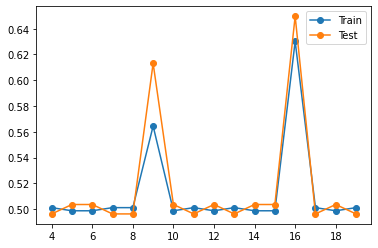

# Layers = 4


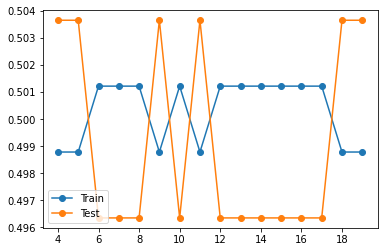

# Layers = 5


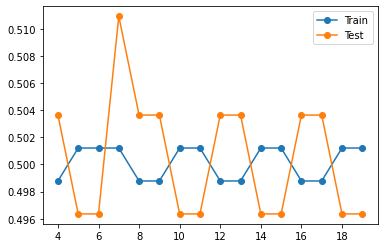

Activation = tanh
Learn Rate = constant
# Layers = 1


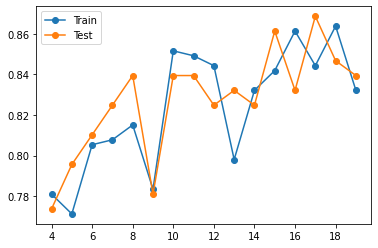

# Layers = 2


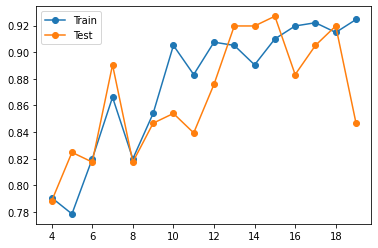

# Layers = 3


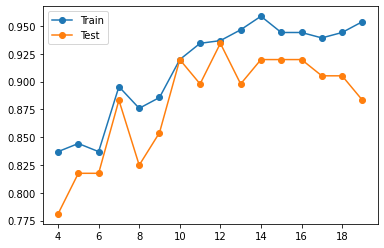

# Layers = 4


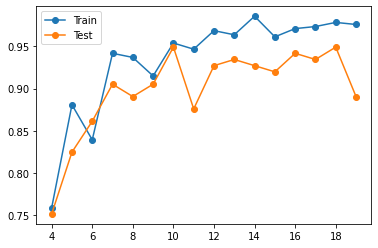

# Layers = 5


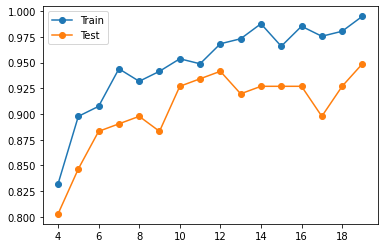

Learn Rate = invscaling
# Layers = 1


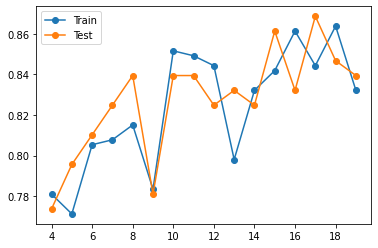

# Layers = 2


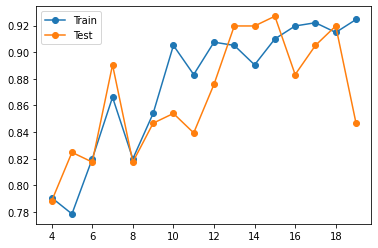

# Layers = 3


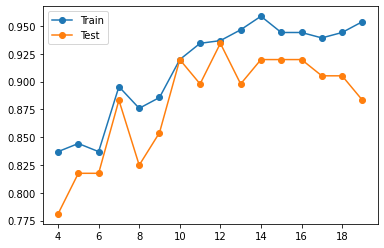

# Layers = 4


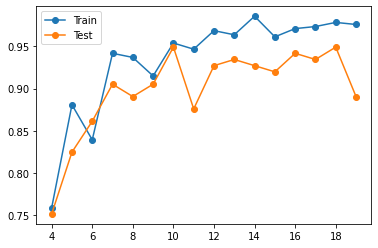

# Layers = 5


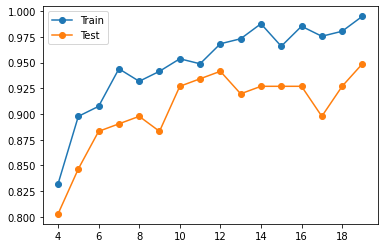

Learn Rate = adaptive
# Layers = 1


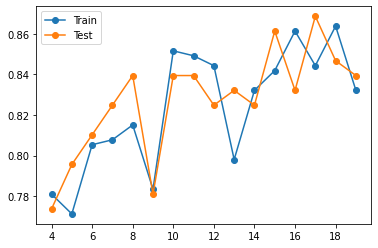

# Layers = 2


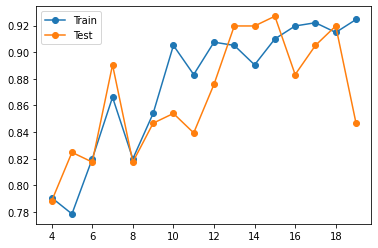

# Layers = 3


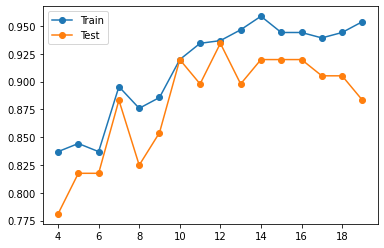

# Layers = 4


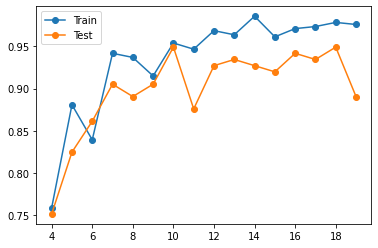

# Layers = 5


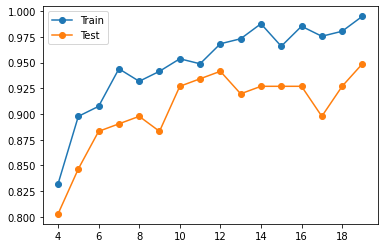

Activation = relu
Learn Rate = constant
# Layers = 1


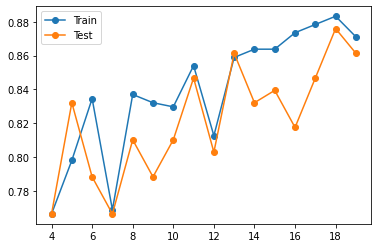

# Layers = 2


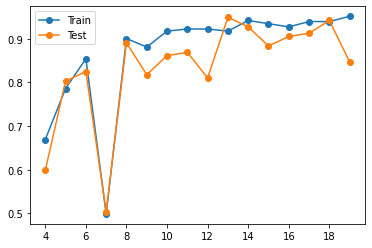

# Layers = 3


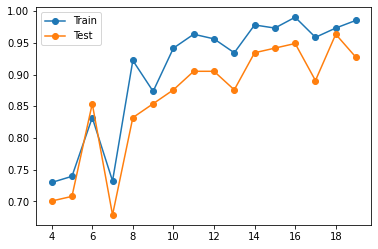

# Layers = 4


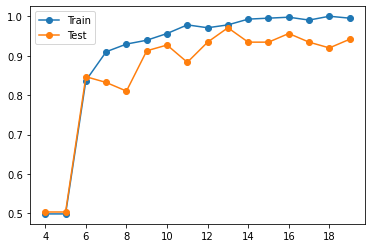

# Layers = 5


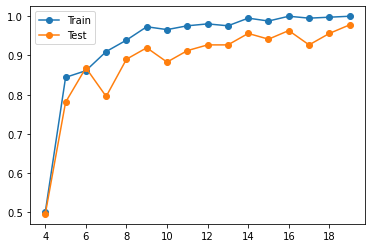

Learn Rate = invscaling
# Layers = 1


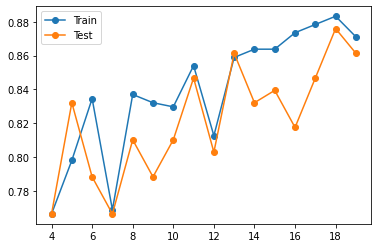

# Layers = 2


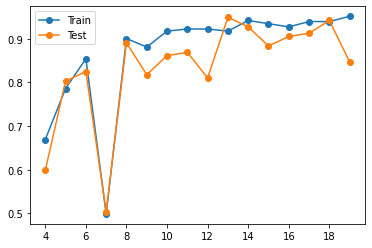

# Layers = 3


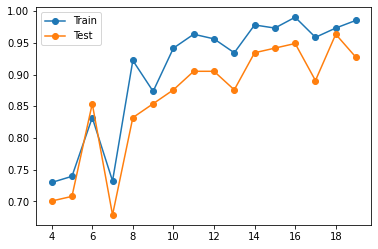

# Layers = 4


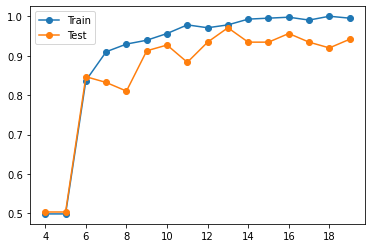

# Layers = 5


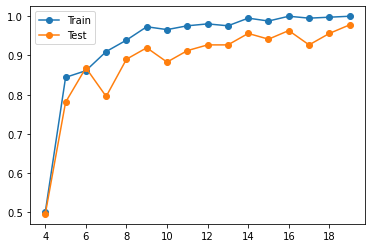

Learn Rate = adaptive
# Layers = 1


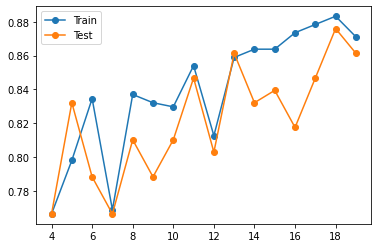

# Layers = 2


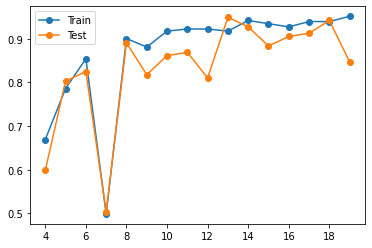

# Layers = 3


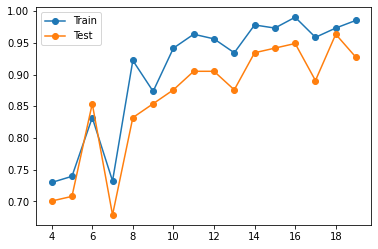

# Layers = 4


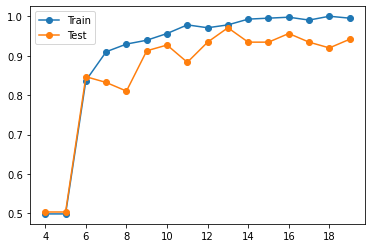

# Layers = 5


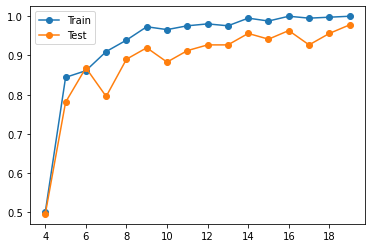

In [116]:
watch_overfit_mlp(x_train, x_test, y_train, y_test)

In [117]:
test_query = """
with districts_short as (
    select id, ratio_urban_inhabitants, avg_salary,
           coalesce(unemployment_96, unemployment_95) as unemployment,
           cast(coalesce(crimes_96, crimes_95) as real) / no_inhabitants as crimes from districts
), t as (
    select account_id, count(*) transaction_count, avg(amount) transaction_avg_amount, min(balance) transaction_min_balance,
           max(balance) transaction_max_balance, avg(balance) transaction_avg_balance
    from transactions
    group by account_id
)
select l.date loan_date, l.amount loan_amount, l.duration loan_duration , l.payments loan_payments,
       a.date account_creation, t.transaction_count, t.transaction_avg_amount, t.transaction_min_balance,
       t.transaction_max_balance, t.transaction_avg_balance,
       d.ratio_urban_inhabitants, d.avg_salary, d.unemployment, d.crimes,
       l.id as loan_id
from loans l
    left join accounts a on l.account_id = a.id
    left join t on t.account_id = a.id
    left join districts_short d on a.district_id = d.id
"""

In [118]:
with sqlite3.connect("./database_test.db") as db_test:
    test_dataset = pd.read_sql_query(sql = test_query, con = db_test)

test_dataset

,loan_date,loan_amount,loan_duration,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,971208,30276,12,2523,960728,164,12113.931098,900.0,119652.7,62991.264634,57.2,9893,4.72,0.025724,4962
1,981014,318480,60,5308,970818,116,7571.999138,-1011.2,104761.5,39953.970690,58.4,8547,3.64,0.021827,4967
2,980419,110736,48,2307,970808,55,4716.194545,13841.0,55991.1,31383.449091,52.7,8402,3.98,0.021370,4968
3,970810,102876,12,8573,960505,118,4844.029661,900.0,60334.7,33057.374576,100.0,10673,5.44,0.056649,4986
4,971206,265320,36,7370,960310,83,8634.156627,379.0,116038.4,46266.574699,53.0,8254,3.76,0.022016,4988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,971211,155760,24,6490,970112,83,13533.985542,200.0,108538.5,51964.019277,84.7,8705,7.61,0.036322,7279
350,970131,67320,36,1870,950920,111,3749.468468,200.0,43949.4,26491.780180,51.4,9307,4.43,0.031794,7286
351,981122,317460,60,5291,970711,145,14354.505517,700.0,135890.4,64978.072414,52.0,8187,5.45,0.020797,7292
352,980927,39168,24,1632,971015,54,7977.972222,300.0,81495.6,55438.851852,63.4,9920,2.87,0.051159,7294


In [119]:
# Everything except loan_duration, loan_status
test_dataset_to_scale = test_dataset[features_to_standardize]

# Scaler
scaler = StandardScaler()
scaled_test_dataset = pd.DataFrame(scaler.fit_transform(test_dataset_to_scale), columns = test_dataset_to_scale.columns)

scaled_test_dataset["loan_id"] = test_dataset['loan_id']
scaled_test_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-0.792683,-1.055550,-0.762452,-0.424659,1.784170,0.574526,0.094377,0.887583,1.397896,-0.532309,0.369161,0.547904,-0.551885,4962
1,1.199873,1.343846,0.483343,1.265997,0.695836,-0.403820,-0.726284,0.449280,-0.288726,-0.472096,-0.679731,0.029544,-0.759676,4967
2,1.078971,-0.385693,-0.859074,1.264322,-0.687254,-1.018970,5.651186,-0.986213,-0.916196,-0.758108,-0.792725,0.192731,-0.784066,4968
3,-0.873556,-0.451130,1.943853,-0.462024,0.741184,-0.991433,0.094377,-0.858365,-0.793644,1.615296,0.976988,0.893478,1.096900,4986
4,-0.793090,0.901271,1.405724,-0.494698,-0.052393,-0.175028,-0.129338,0.781201,0.173437,-0.743055,-0.908056,0.087139,-0.749618,4988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.792074,-0.010853,1.012079,1.147702,-0.052393,0.880410,-0.206200,0.560451,0.590562,0.847578,-0.556607,1.934999,0.013112,7279
350,-1.011527,-0.747146,-1.054555,-2.068063,0.582468,-1.227205,-0.206200,-1.340645,-1.274329,-0.823339,-0.087489,0.408715,-0.228292,7286
351,1.221819,1.335354,0.475738,1.248069,1.353371,1.057152,0.008498,1.365519,1.543356,-0.793233,-0.960267,0.898278,-0.814578,7292
352,1.182195,-0.981521,-1.161017,1.299006,-0.709927,-0.316373,-0.163260,-0.235521,0.844964,-0.221207,0.390201,-0.340029,0.804160,7294


In [120]:
scaled_test_dataset = scaled_test_dataset.drop_duplicates()
scaled_test_dataset

,loan_date,loan_amount,loan_payments,account_creation,transaction_count,transaction_avg_amount,transaction_min_balance,transaction_max_balance,transaction_avg_balance,ratio_urban_inhabitants,avg_salary,unemployment,crimes,loan_id
0,-0.792683,-1.055550,-0.762452,-0.424659,1.784170,0.574526,0.094377,0.887583,1.397896,-0.532309,0.369161,0.547904,-0.551885,4962
1,1.199873,1.343846,0.483343,1.265997,0.695836,-0.403820,-0.726284,0.449280,-0.288726,-0.472096,-0.679731,0.029544,-0.759676,4967
2,1.078971,-0.385693,-0.859074,1.264322,-0.687254,-1.018970,5.651186,-0.986213,-0.916196,-0.758108,-0.792725,0.192731,-0.784066,4968
3,-0.873556,-0.451130,1.943853,-0.462024,0.741184,-0.991433,0.094377,-0.858365,-0.793644,1.615296,0.976988,0.893478,1.096900,4986
4,-0.793090,0.901271,1.405724,-0.494698,-0.052393,-0.175028,-0.129338,0.781201,0.173437,-0.743055,-0.908056,0.087139,-0.749618,4988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,-0.792074,-0.010853,1.012079,1.147702,-0.052393,0.880410,-0.206200,0.560451,0.590562,0.847578,-0.556607,1.934999,0.013112,7279
350,-1.011527,-0.747146,-1.054555,-2.068063,0.582468,-1.227205,-0.206200,-1.340645,-1.274329,-0.823339,-0.087489,0.408715,-0.228292,7286
351,1.221819,1.335354,0.475738,1.248069,1.353371,1.057152,0.008498,1.365519,1.543356,-0.793233,-0.960267,0.898278,-0.814578,7292
352,1.182195,-0.981521,-1.161017,1.299006,-0.709927,-0.316373,-0.163260,-0.235521,0.844964,-0.221207,0.390201,-0.340029,0.804160,7294


In [121]:
col_names_to_encode = ["loan_duration"]
test_dataset_to_hotencode = test_dataset[col_names_to_encode]

encoder = OneHotEncoder(sparse=False)
res = encoder.fit(test_dataset_to_hotencode)

columns = []
for index, column_name in enumerate(col_names_to_encode):
    columns = columns + [f"is_{column_name}_{val}" for val in res.categories_[index]]

hot_encoded_test_dataset = pd.DataFrame(res.transform(test_dataset_to_hotencode), columns = columns)

hot_encoded_test_dataset


# Recreate train_dataset after preprocessing

pre_processed_test_dataframe = scaled_test_dataset.join(hot_encoded_test_dataset)
pre_processed_test_dataframe = pre_processed_test_dataframe.drop_duplicates()
pre_processed_test_dataframe = pre_processed_test_dataframe.reset_index()
pre_processed_test_dataframe = pre_processed_test_dataframe.drop(['index'], axis=1)

target_features = pre_processed_test_dataframe.drop(['loan_id'], axis=1)
target_ids = pre_processed_test_dataframe.loan_id

In [122]:
shape = tuple(20 for _ in range(5))
nn = MLPClassifier(hidden_layer_sizes=shape, activation="tanh", learning_rate="invscaling", random_state=19)
nn.fit(x_train, y_train)

probabilities = nn.predict_proba(target_features)
positive_probabilities = [row[0] for row in probabilities]

In [123]:
import csv
with open("predictions/v1/mlp_resampled_preprocessed_outliers_5x20_tanh_invscaling.csv", "w") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["Id", "Predicted"])
    writer.writerows(zip(target_ids, positive_probabilities))